In [1]:
import json

history_path = r"C:\Users\Metehan Sevgil\Desktop\KODLAR\Anaconda\Bitirme\history\history_densenet121_256.json"

with open(history_path, "r") as f:
    history = json.load(f)

print("Eğitim sırasında takip edilen metrikler:", history.keys())


Eğitim sırasında takip edilen metrikler: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [2]:
train_acc = history["accuracy"]
val_acc = history["val_accuracy"]
train_loss = history["loss"]
val_loss = history["val_loss"]

In [3]:
best_epoch = val_loss.index(min(val_loss))

print(f"En iyi epoch (Minimum val_loss): {best_epoch + 1}")
print(f"Train Accuracy (Epoch {best_epoch + 1}): {train_acc[best_epoch]:.4f}")
print(f"Validation Accuracy (Epoch {best_epoch + 1}): {val_acc[best_epoch]:.4f}")
print(f"Train Loss (Epoch {best_epoch + 1}): {train_loss[best_epoch]:.4f}")
print(f"Validation Loss (Epoch {best_epoch + 1}): {val_loss[best_epoch]:.4f}")

En iyi epoch (Minimum val_loss): 13
Train Accuracy (Epoch 13): 0.9969
Validation Accuracy (Epoch 13): 0.9994
Train Loss (Epoch 13): 0.0113
Validation Loss (Epoch 13): 0.0028


In [1]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\Metehan Sevgil\Desktop\KODLAR\Anaconda\Bitirme\models\densenet121_model_256.h5")

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator



batch_size = 64
img_size = (256, 256)

test_gen = ImageDataGenerator(rescale=1. / 255)
test_data = test_gen.flow_from_directory(r"C:\Users\Metehan Sevgil\Desktop\KODLAR\Anaconda\Bitirme\dataset\test",
                                         target_size=img_size,
                                         batch_size=batch_size,
                                         color_mode='rgb',
                                         class_mode='categorical')

Found 5000 images belonging to 5 classes.


In [5]:
test_loss, test_acc = model.evaluate(test_data)
print(f"\nModelin Test Seti Üzerindeki Performansı:")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

79/79 [==============================] - 62s 342ms/step - loss: 0.0050 - accuracy: 0.9980

Modelin Test Seti Üzerindeki Performansı:
Test Accuracy: 0.9980
Test Loss: 0.0050


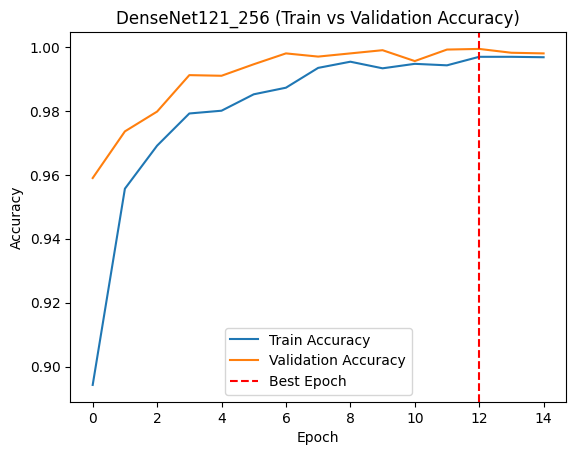

In [25]:
import matplotlib.pyplot as plt

plt.plot(history["accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.axvline(best_epoch, linestyle="--", color="red", label="Best Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("DenseNet121_256 (Train vs Validation Accuracy)")
plt.show()

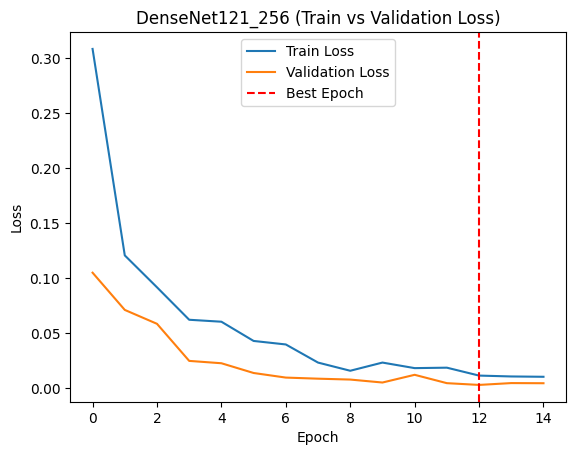

In [26]:
plt.plot(history["loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.axvline(best_epoch, linestyle="--", color="red", label="Best Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("DenseNet121_256 (Train vs Validation Loss)")
plt.show()

In [32]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
y_true = []
y_pred_probs = []

for i in range(len(test_data)):
    img_batch, label_batch = next(test_data)
    y_true.extend(np.argmax(label_batch, axis=1)) 
    preds = model.predict(img_batch)  
    y_pred_probs.extend(preds)

1/1 [==============================] - 0s 45ms/step


In [29]:
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)
y_pred = np.argmax(y_pred_probs, axis=1)

In [30]:
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

   colon_aca     1.0000    1.0000    1.0000      1000
     colon_n     1.0000    1.0000    1.0000      1000
    lung_aca     0.9970    0.9930    0.9950      1000
      lung_n     1.0000    1.0000    1.0000      1000
    lung_scc     0.9930    0.9970    0.9950      1000

    accuracy                         0.9980      5000
   macro avg     0.9980    0.9980    0.9980      5000
weighted avg     0.9980    0.9980    0.9980      5000



In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_true, y_pred, average="weighted")
print(f"Precision: {precision:.4f}")

recall = recall_score(y_true, y_pred, average="weighted")
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_true, y_pred, average="weighted")
print(f"F1-score: {f1:.4f}")

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.9980
Recall: 0.9980
F1-score: 0.9980
Accuracy: 0.9980


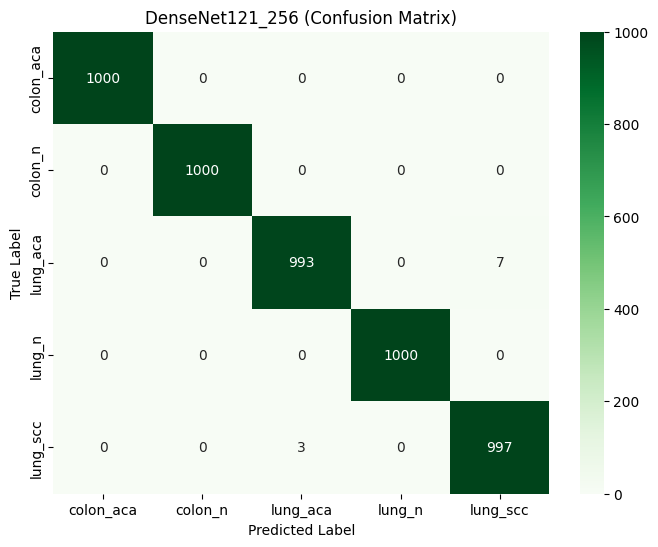

In [33]:
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DenseNet121_256 (Confusion Matrix)")
plt.show()